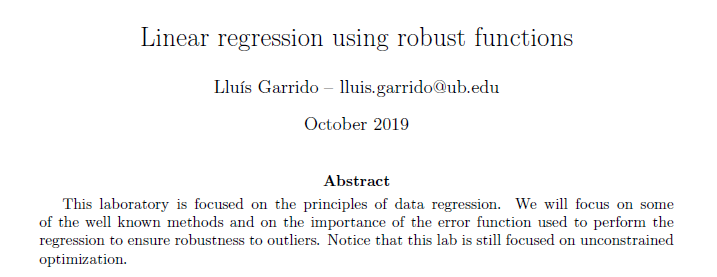


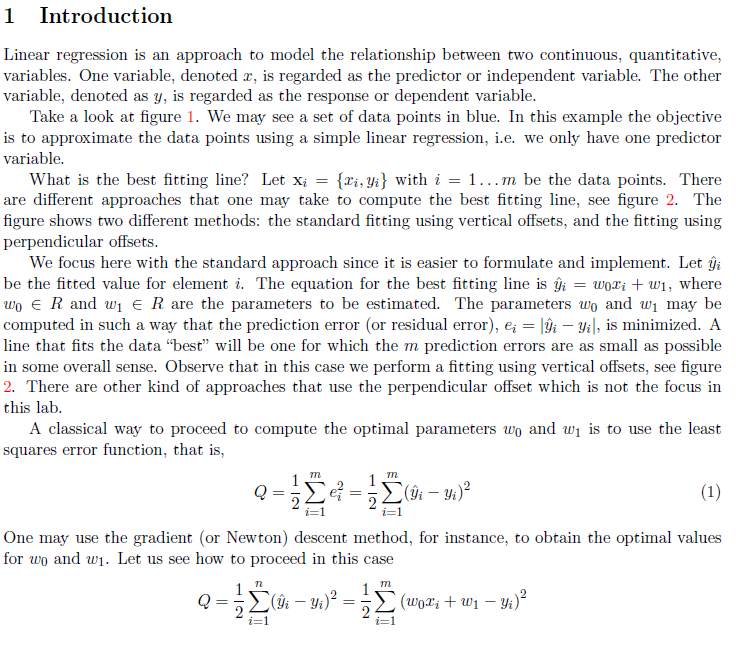

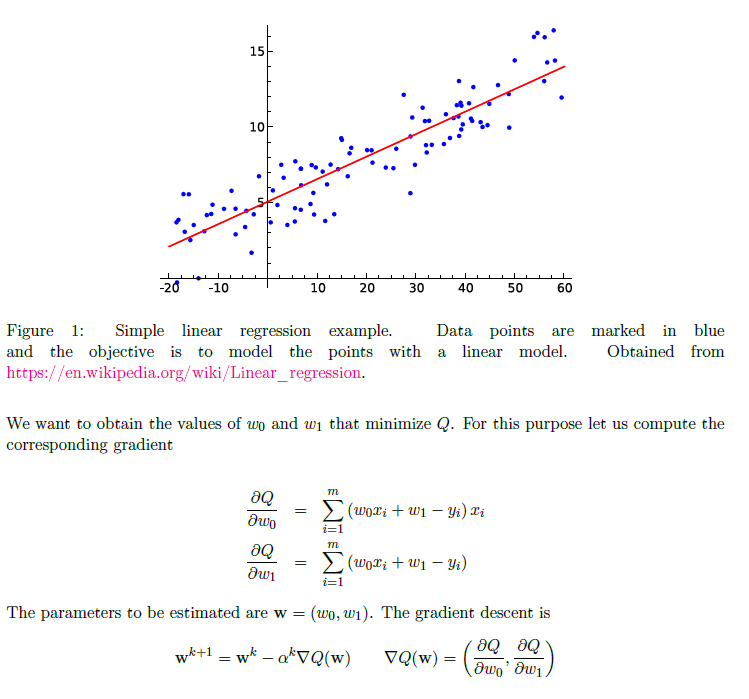

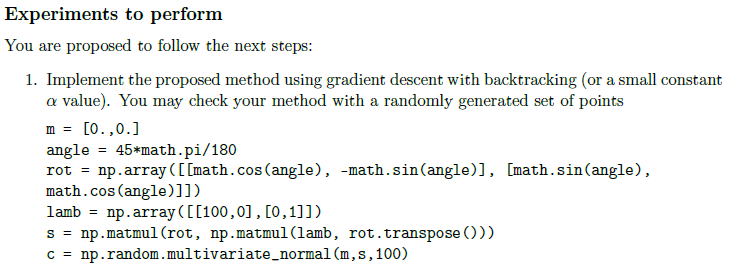

In [32]:
# ALL IMPORTS HERE
import math
import numpy as np
import matplotlib.pyplot as plt


def f(w, x):
    return w[0] * x + w[1]


def Q(w, x, y):
    return ((w[0] * x + w[1] - y)**2).sum() / 2


def grad_Q(w, x, y):
    return np.array([((w[0] * x + w[1] - y) * x).sum(),
                     (w[0] * x + w[1] - y).sum()])


#GRADIENT DESCENT WITH ADAPTATIVE ALPHA AND FIXED STEP
def grad_descent(f,
                 grad_f,
                 w0,
                 x,
                 y,
                 fdif_threshold=1e-20,
                 grad_threshold=1e-20,
                 alfa_threshold=1e-20):

    w1 = w0
    f1 = f(w1, x, y)

    w_list = []
    w_list.append(w1)
    gradf_list = []

    loop_out = True
    loop_alfa = True
    j = 0
#     print('w0:', w1, 'f1:', f1, end=' ')
    while loop_out:
        j = j + 1
        gradf = grad_f(w1, x, y)
        if np.linalg.norm(gradf) <= grad_threshold:
#             print('grad_threshold:', np.linalg.norm(gradf), 'w2:', w2,
#                   'loops:', j)
            return w2, np.array(w_list)

        alfa = 1.0
        i = 0
        while loop_alfa:
            i = i + 1
            if alfa < alfa_threshold:
                w_list.append(w2)
#                 print('alfa_threshold:', alfa, 'w2:', w2, 'inner loops:', i,
#                       'outer loops:', j)
                return w2, np.array(w_list)
            else:
                w2 = w1 - alfa * gradf
                f2 = f(w2, x, y)
                if f2 < f1:
                    loop_alfa = False
                else:
                    alfa = alfa / 2
        loop_alfa = True
        w_list.append(w2)
        if abs(f2 - f1) <= fdif_threshold:
#             print('fdif_threshold:', abs(f2 - f1), 'w2:', w2, 'loops:', j)
            return w2, np.array(w_list)

        w1 = w2
        f1 = f2


def prepare_data():
    m = [0., 0.]
    angle = 45 * math.pi / 180
    rot = np.array([[math.cos(angle), -math.sin(angle)],
                    [math.sin(angle), math.cos(angle)]])
    lamb = np.array([[100, 0], [0, 1]])
    s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
    c = np.random.multivariate_normal(m, s, 100)
    return c


def test_lin_reg(c, Q, grad_Q, f):
    x = c[:, 0]
    y = c[:, 1]
    w = np.array([1, 1])

    w, _ = grad_descent(Q,
                        grad_Q,
                        w,
                        x,
                        y,
                        fdif_threshold=1e-20,
                        grad_threshold=1e-20,
                        alfa_threshold=1e-20)
    plt.plot(x, f(w, x))
    plt.scatter(x, y)
    plt.show()
    return w

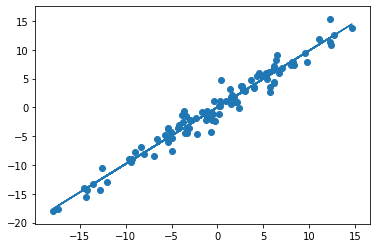

array([0.98565216, 0.02705736])

In [33]:
c = prepare_data()

test_lin_reg(c, Q, grad_Q, f)

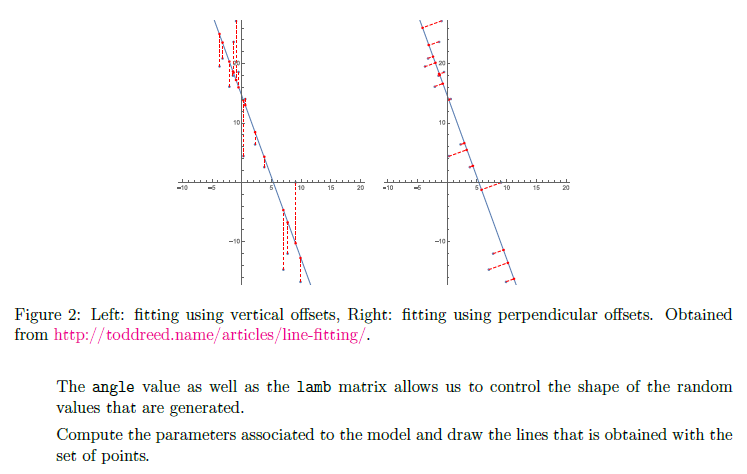

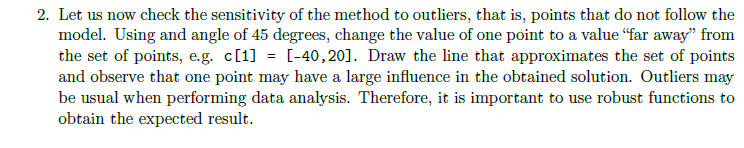

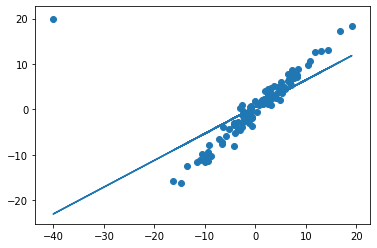

array([0.59021427, 0.56617796])

In [34]:
#Pt2
def prepare_data_outlier():
    c = prepare_data()
    c[np.random.randint(100)] = [-40, 20]
    return c


c = prepare_data_outlier()
test_lin_reg(c, Q, grad_Q, f)

cuadrado choto

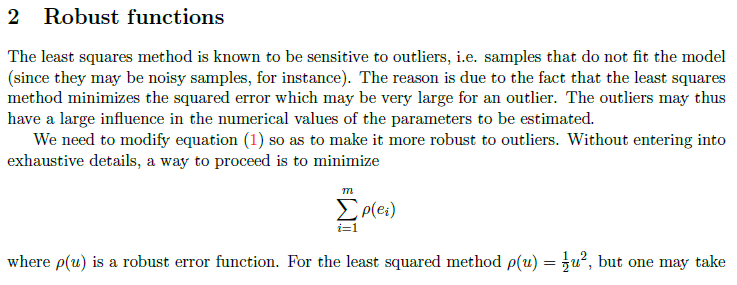

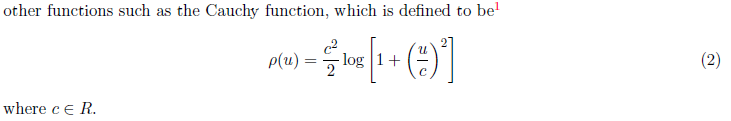

In [35]:
def p(u, type, c=1.0):
    if type == 'ls':
        return u**2 / 2
    elif type == 'cauchy':
        return (c**2 / 2) * np.log(1 + (u / c)**2)

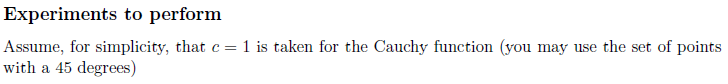

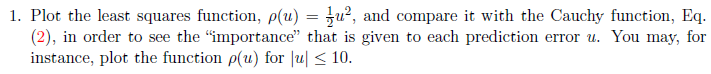

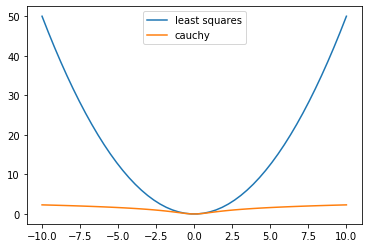

In [36]:
linsp = np.linspace(-10, 10)
plt.plot(linsp, p(linsp, type='ls'), label='least squares')
plt.plot(linsp, p(linsp, type='cauchy'), label='cauchy')
plt.legend(loc='upper center')
plt.show()

suavecito outliers

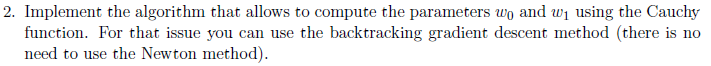

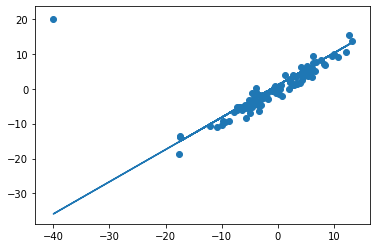

array([0.92118871, 0.99896883])

In [37]:
def Q_cauchy(w, x, y, c=1.0):
    e = w[0] * x + w[1] - y
    return (p(e, type='cauchy', c=1.0)).sum()


c = prepare_data_outlier()

test_lin_reg(c, Q_cauchy, grad_Q, f)

expectado

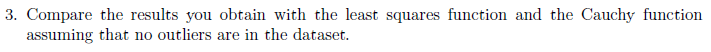

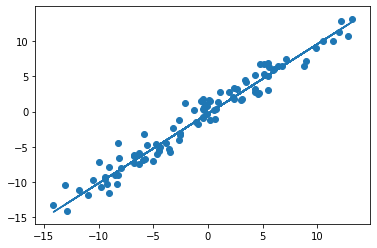

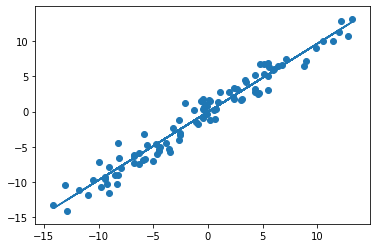

res_cauchy: [ 0.98932349 -0.30437448] 
res_lsquar: [ 0.96924139 -0.05255234]


In [38]:
def Q_ls(w, x, y):
    e = w[0] * x + w[1] - y
    return (p(e, type='ls')).sum()


c = prepare_data()
res_cauchy = test_lin_reg(c, Q_cauchy, grad_Q, f)
res_ls = test_lin_reg(c, Q_ls, grad_Q, f)
print("res_cauchy:", res_cauchy, '\nres_lsquar:', res_ls)

expected

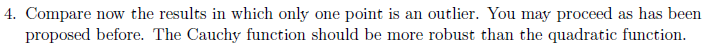

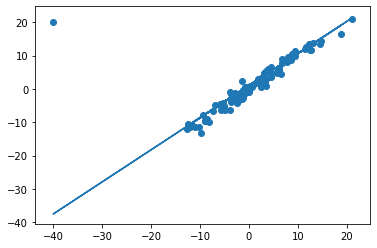

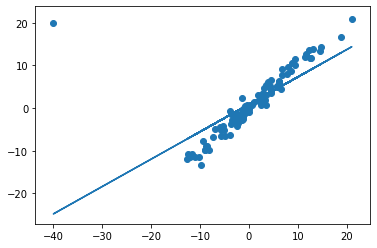

res_cauchy: [0.96295414 0.99961562] 
res_lsquar: [0.64209666 0.87688545]


In [39]:
c = prepare_data_outlier()
res_cauchy = test_lin_reg(c, Q_cauchy, grad_Q, f)
res_ls = test_lin_reg(c, Q_ls, grad_Q, f)
print("res_cauchy:", res_cauchy, '\nres_lsquar:', res_ls)

expected

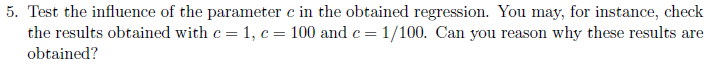

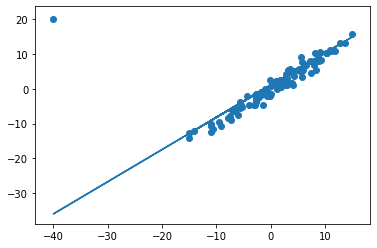

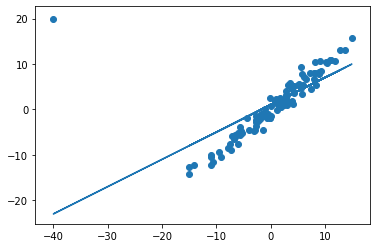

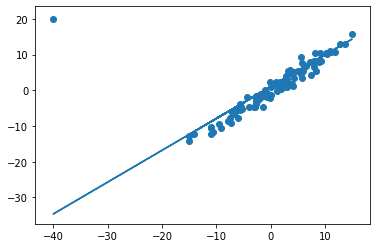

res_cauchy_1: [0.92243765 0.99847253] 
res_cauchy_100: [0.60080138 0.9755706 ] 
res_cauchy_1_100: [0.89075543 0.99774552]


In [41]:
c = prepare_data_outlier()
def Q_cauchy(w, x, y, c=1.0):
    return (p(w[0] * x + w[1] - y, type='cauchy', c=c)).sum()
res_cauchy_1 = test_lin_reg(c, Q_cauchy, grad_Q, f)

def Q_cauchy(w, x, y, c=100.0):
    return (p(w[0] * x + w[1] - y, type='cauchy', c=c)).sum()
res_cauchy_100 = test_lin_reg(c, Q_cauchy, grad_Q, f)

def Q_cauchy(w, x, y, c=0.01):
    return (p(w[0] * x + w[1] - y, type='cauchy', c=c)).sum()
res_cauchy_1_100 = test_lin_reg(c, Q_cauchy, grad_Q, f)

print("res_cauchy_1:", res_cauchy_1, '\nres_cauchy_100:', res_cauchy_100, '\nres_cauchy_1_100:', res_cauchy_1_100)

expected

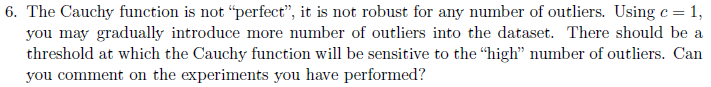

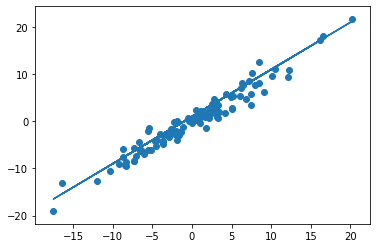

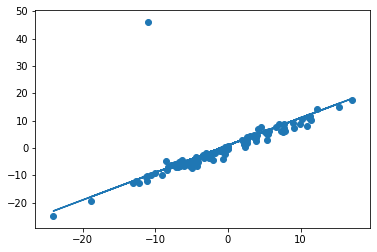

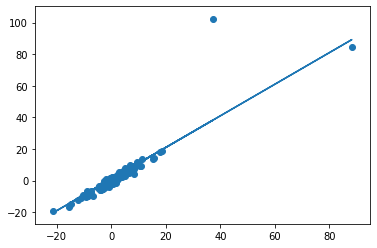

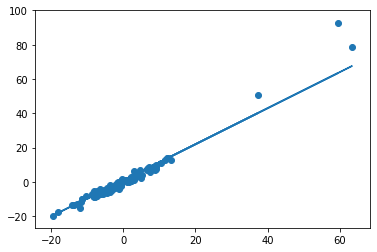

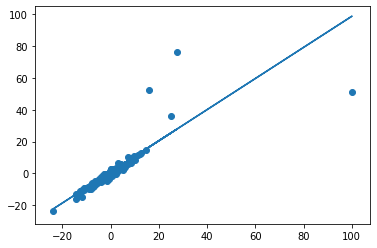

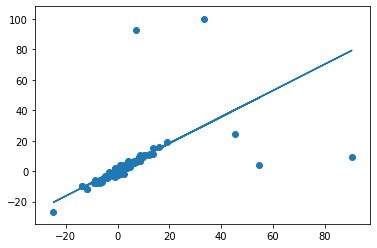

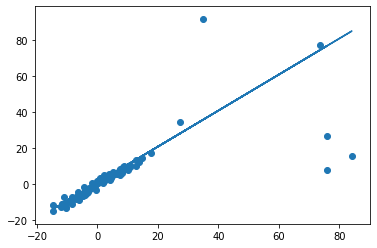

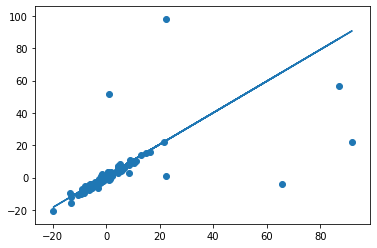

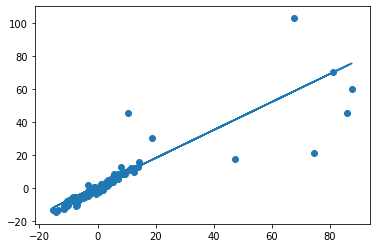

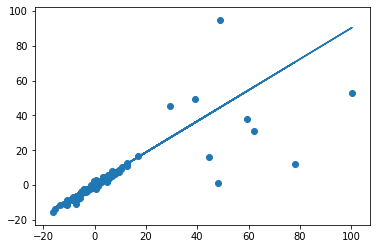

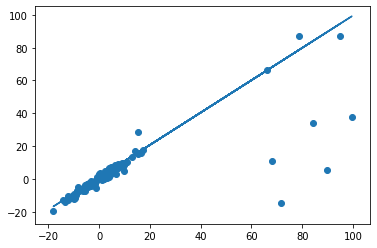

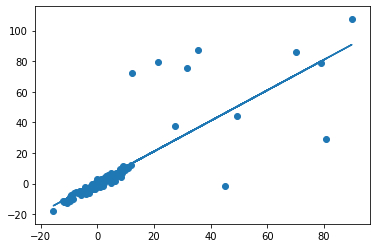

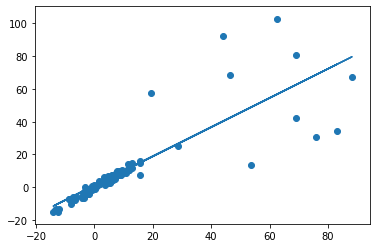

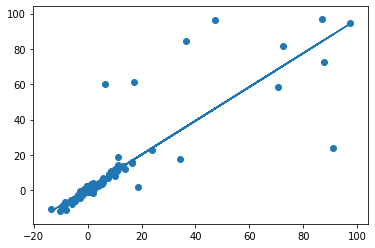

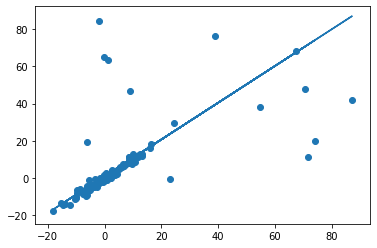

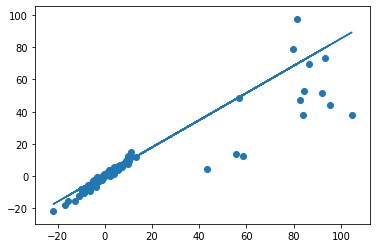

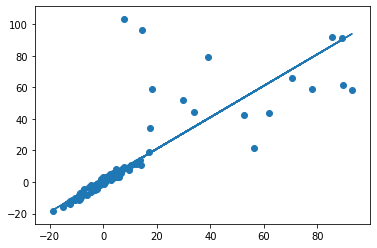

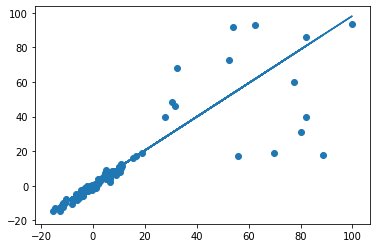

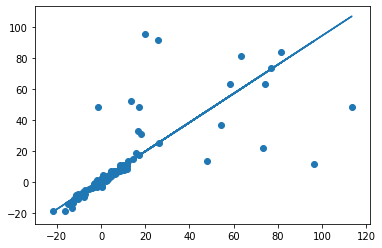

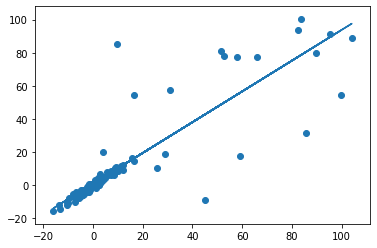

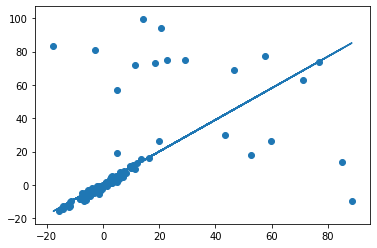

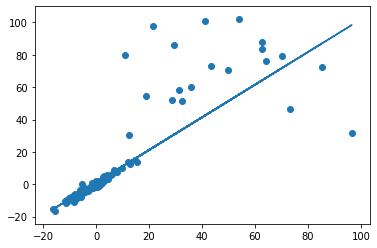

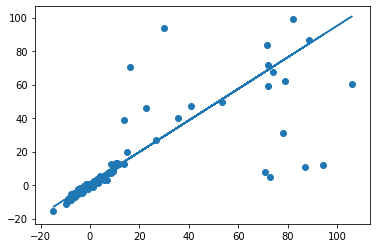

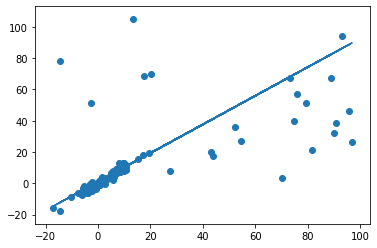

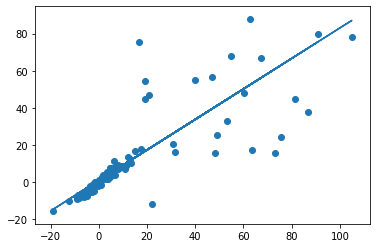

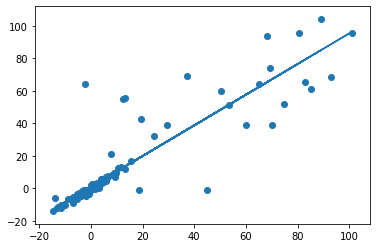

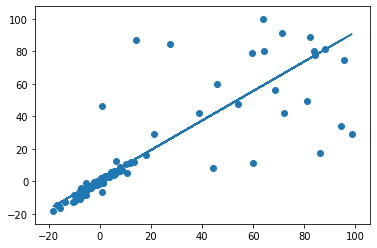

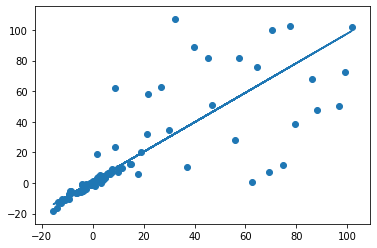

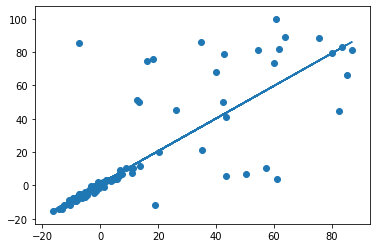

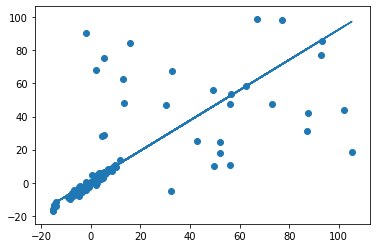

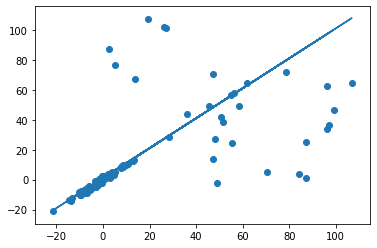

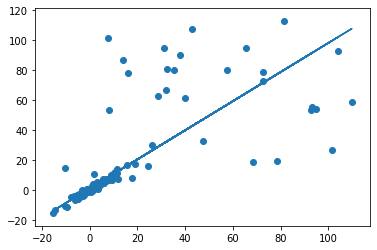

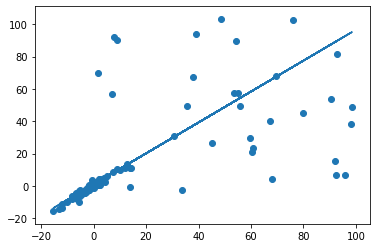

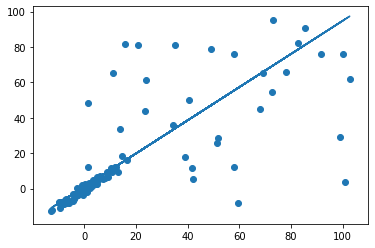

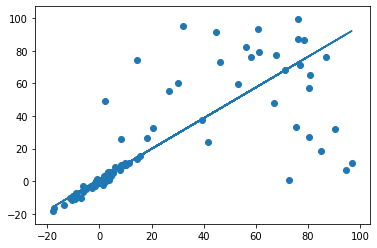

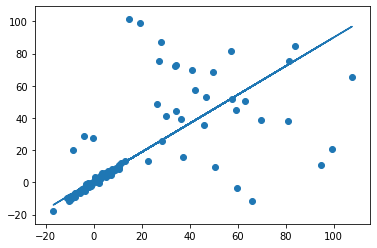

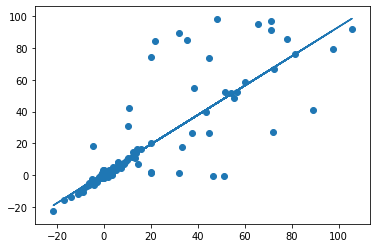

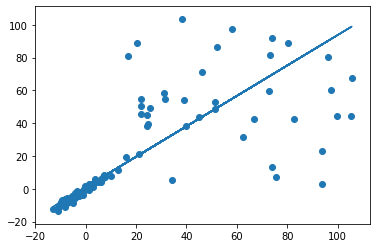

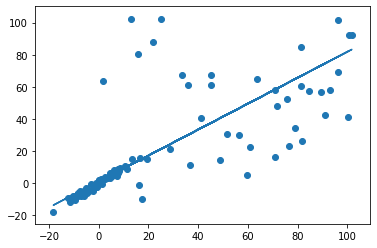

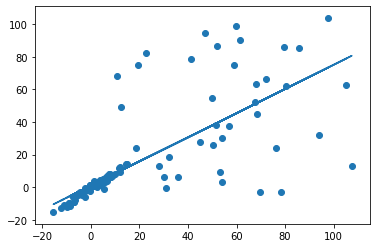

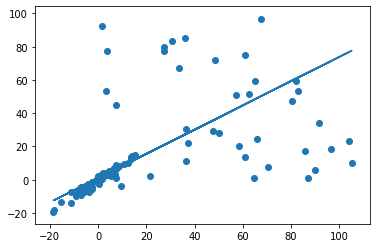

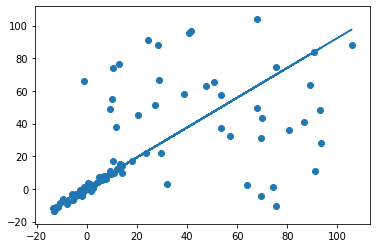

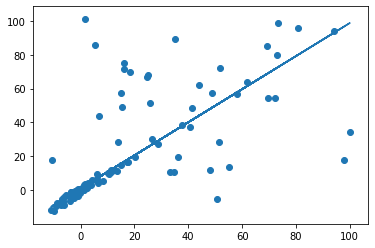

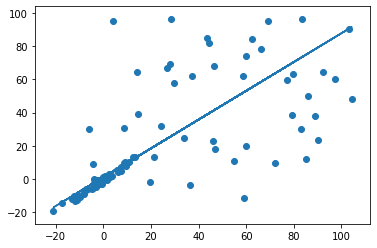

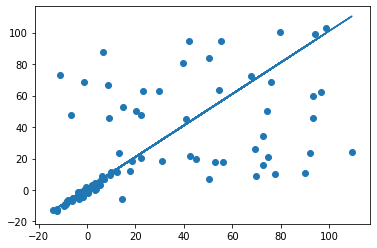

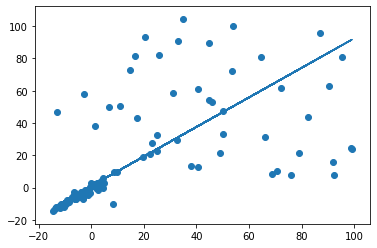

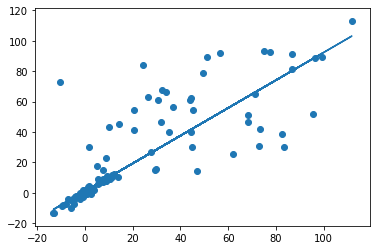

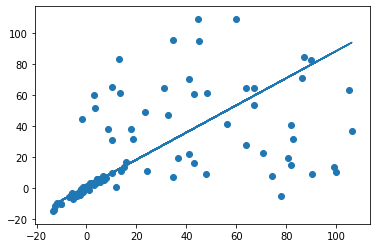

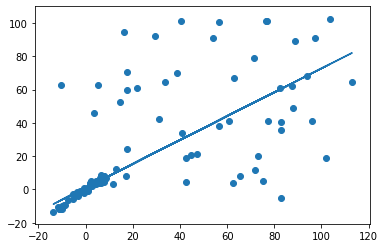

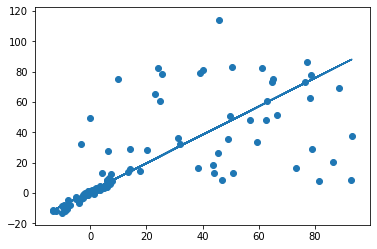

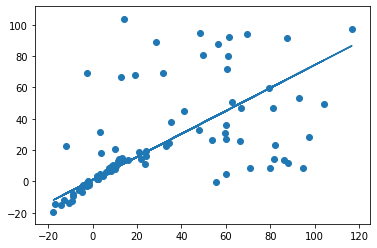

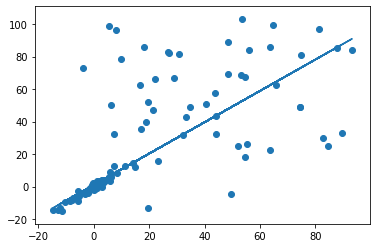

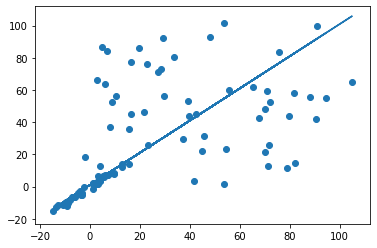

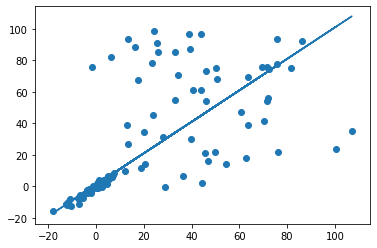

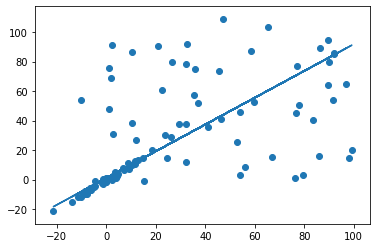

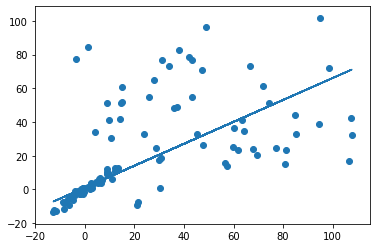

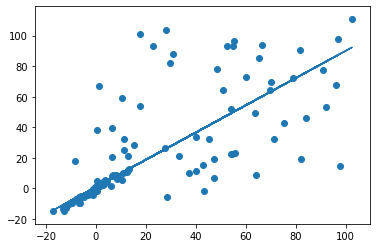

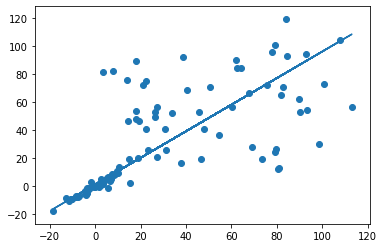

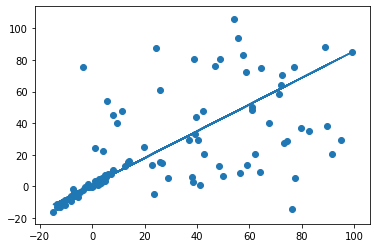

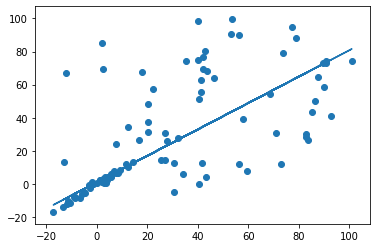

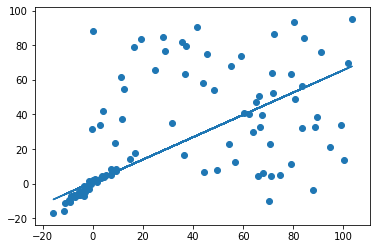

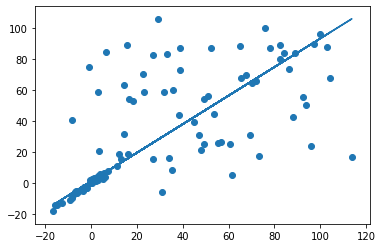

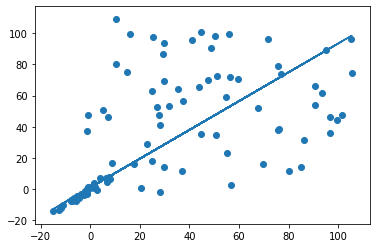

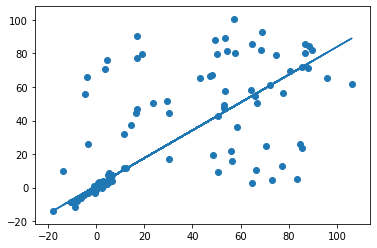

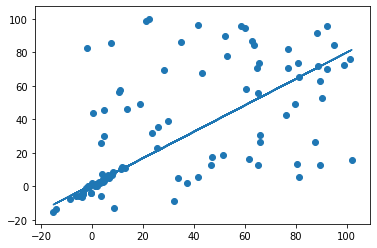

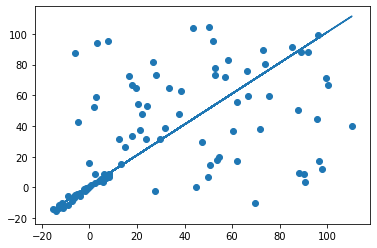

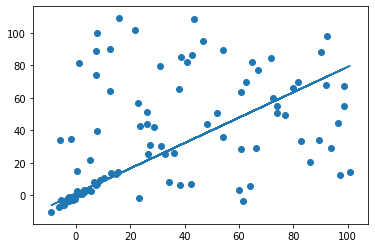

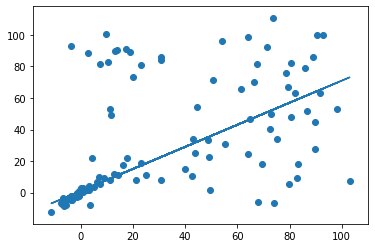

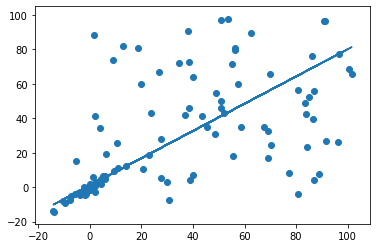

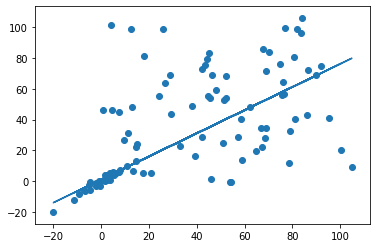

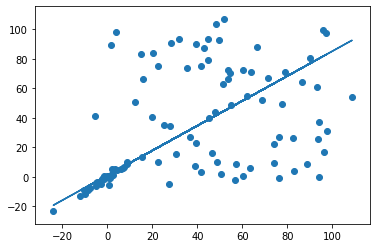

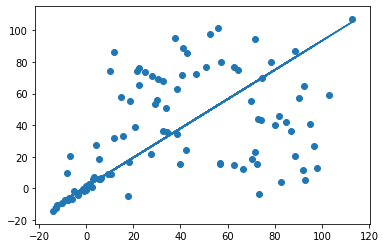

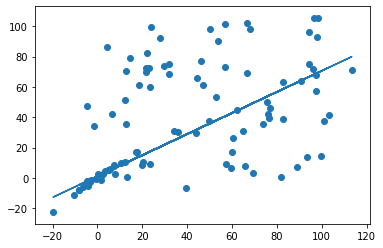

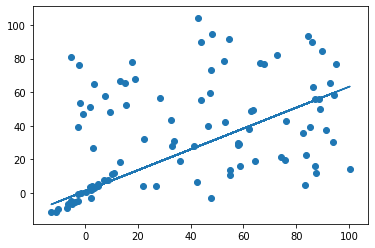

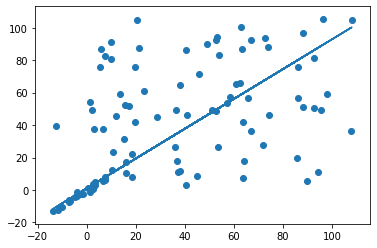

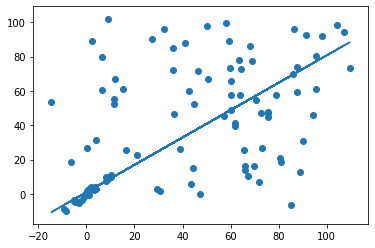

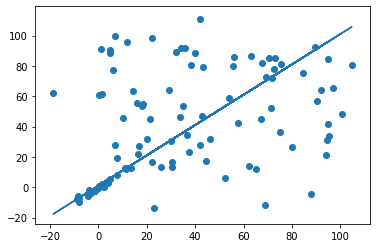

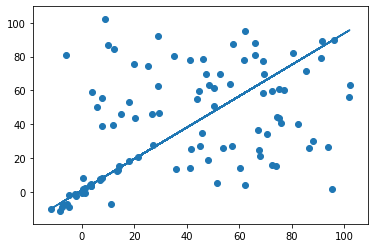

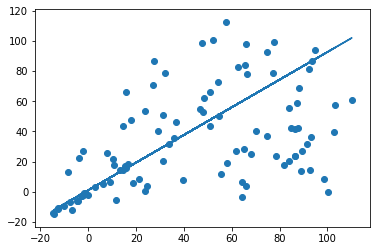

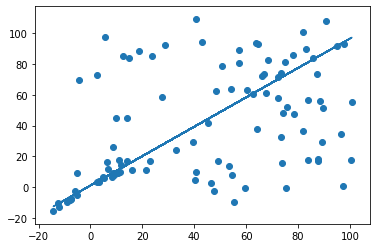

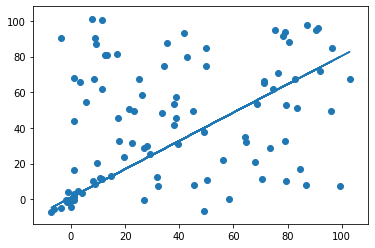

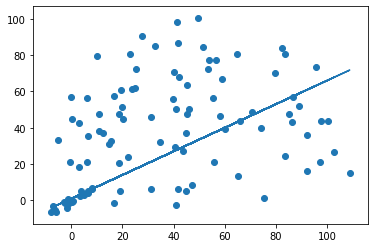

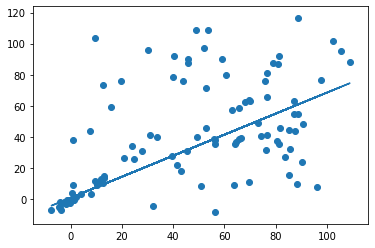

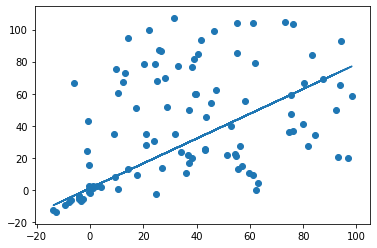

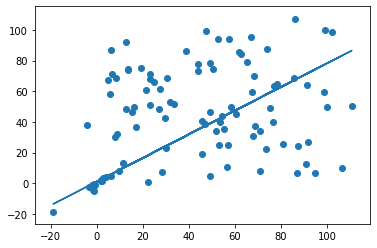

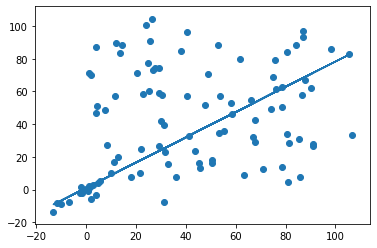

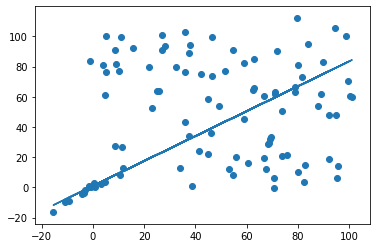

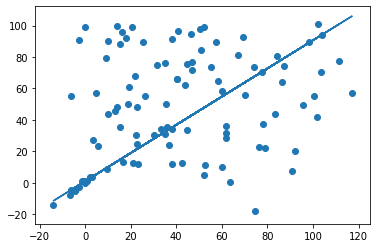

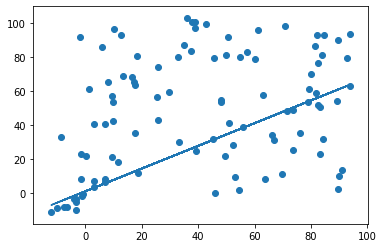

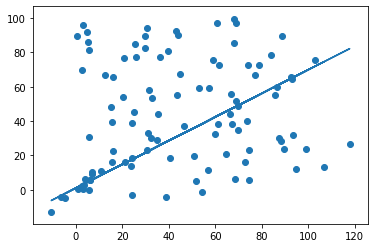

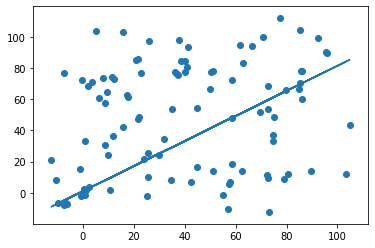

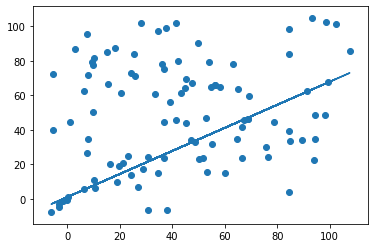

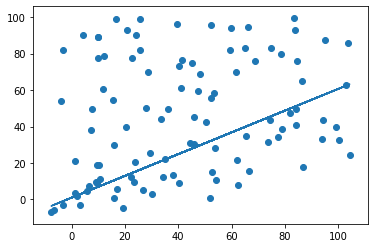

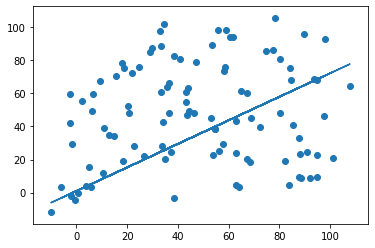

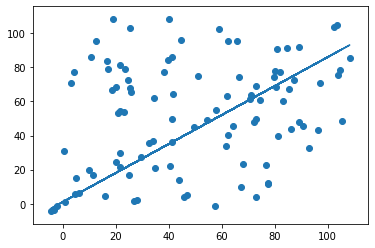

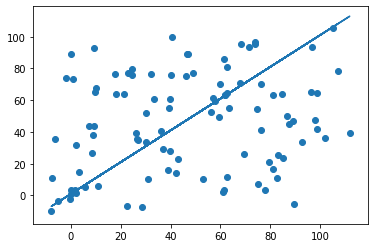

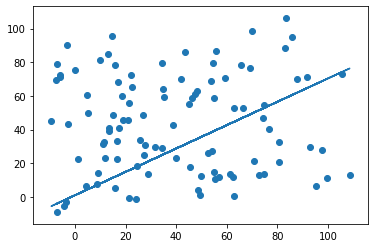

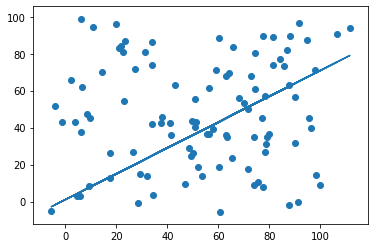

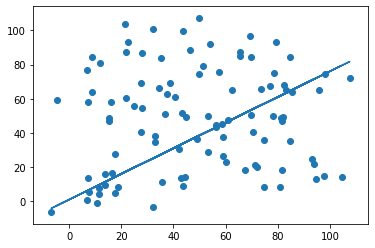

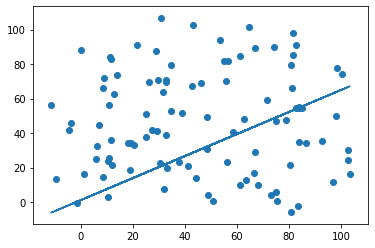

[0.0,
 0.0,
 0.051839631876981186,
 0.02178753836911645,
 0.1344408013362274,
 4.440892098500626e-16,
 0.024611250309401988,
 0.150343628904179,
 0.10871456221631251,
 0.014069401464550216,
 0.0,
 0.1090044545963289,
 0.04357948475941272,
 0.013481747549423004,
 0.15592567863654433,
 1.1102230246251565e-16,
 0.027733450772489614,
 0.06801599305159463,
 0.0718870390723898,
 0.05012479449368338,
 0.008987115671561232,
 0.057894193817080705,
 0.0849093996702399,
 0.1797228729110837,
 0.0565176002462787,
 0.09115753480142545,
 0.03374772658026408,
 0.027040895020887024,
 0.08400224675182646,
 6.661338147750939e-16,
 0.027223174451806366,
 0.0437240721877483,
 0.061596372771124584,
 0.05859358514327372,
 0.1095370629178547,
 0.07782081768408461,
 0.07262004483085684,
 0.19150457000076224,
 0.25849744696670635,
 0.2715945366228343,
 0.08559079020019005,
 0.02331553720034352,
 0.1309740968294788,
 7.771561172376096e-16,
 0.08596041197686442,
 0.08650749210629399,
 0.12466753949010546,
 0.2826

In [50]:
def prepare_data_outliers(qty=1):
    c = prepare_data()
    for i in np.random.permutation(len(c))[:qty]:
        c[i] = c[i]+ 100*np.random.random(c[i].shape)
    return c

def Q_cauchy(w, x, y, c=1.0):
    return (p(w[0] * x + w[1] - y, type='cauchy', c=c)).sum()

c = prepare_data_outliers(0)
w_ref = test_lin_reg(c, Q_cauchy, grad_Q, f)

dim = range(1, 100)
res = []
for i in dim:
    c = prepare_data_outliers(i)
    w = test_lin_reg(c, Q_cauchy, grad_Q, f)
    res.append(np.linalg.norm(w-w_ref))
    
res

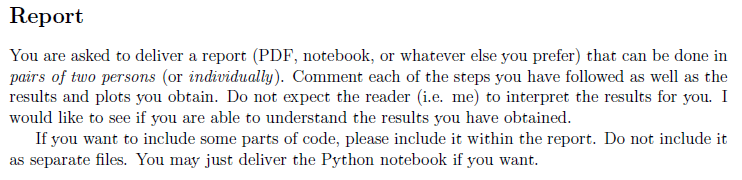

In [45]:
import numpy as np

hola = np.random.permutation(10)
prepare_data_outlier(qty=1)

TypeError: prepare_data_outlier() got an unexpected keyword argument 'qty'

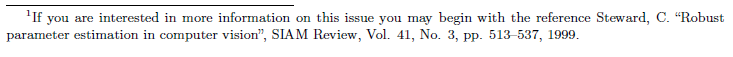